# AMPSphere v.2022-03

This is a notebook meant to form the set of notebooks used to analyze the data in AMPSphere and write the manuscript:

__AMPSphere: Global survey of prokaryotic antimicrobial peptides shaping microbiomes__

Figures generated in this script formed the panel shown in Figure 1C-E.

## Overlap of AMPs from different environments is relevant

Here we will show how overlap of c_AMPs from different environments was computed.

In [1]:
# load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from itertools import chain, permutations

In [2]:
# load data
data = pd.read_table('data/gmsc_amp_genes_envohr_source.tsv.gz',
                     sep='\t',
                     header='infer')

In [3]:
# filter duplicates
data = data[data.is_metagenomic == True]
data = data[['amp', 'general_envo_name']].drop_duplicates()
data = data.groupby('general_envo_name')['amp'].apply(lambda x: set(x))

In [4]:
# add environments with at least 100 peptides
data = data.apply(lambda x: x if len(x) >= 100 else 'NA')
data = data[data != 'NA']

In [5]:
# creating sets of environments
higher_level = {
        'sediment' : 'other',
        'bird gut' : 'other animal',
        'cat gut' : 'mammal gut',
        'insect associated' : 'other animal',
        'human urogenital tract' : 'other human',
        'dog gut' : 'mammal gut',
        'fermented food' : 'anthropogenic',
        'groundwater' : 'aquatic',
        'coral associated' : 'other animal',
        'rat gut' : 'mammal gut',
        'human associated' : 'other human',
        'cattle gut' : 'mammal gut',
        'deer gut' : 'mammal gut',
        'mouse gut' : 'mammal gut',
        'river associated' : 'aquatic',
        'primate gut' : 'mammal gut',
        'human respiratory tract' : 'other human',
        'cattle rumen' : 'other animal',
        'human saliva' : 'other human',
        'activated sludge' : 'anthropogenic',
        'lake associated' : 'aquatic',
        'wastewater' : 'anthropogenic',
        'chicken gut' : 'other animal',
        'air' : 'other',
        'human mouth' : 'other human',
        'plant associated' : 'soil/plant',
        'water associated' : 'aquatic',
        'pig gut' : 'mammal gut',
        'human skin' : 'other human',
        'marine' : 'aquatic',
        'soil' : 'soil/plant',
        'built environment' : 'anthropogenic',
        'human gut' : 'human gut',
        'anthropogenic': 'anthropogenic',
        'bear gut' : 'mammal gut',
        'rabbit gut': 'mammal gut',
        'algae associated': 'other',
        'crustacean gut': 'other animal',
        'cattle associated': 'other animal',
        'bird skin': 'other animal',
        'bee gut': 'other animal',
        'mussel associated': 'other animal',
        'fisher gut': 'mammal gut',
        'bat gut': 'mammal gut',
        'sponge associated': 'other animal',
        'human digestive tract': 'other human',
        'beatle gut': 'other animal',
        'dog associated': 'other animal',
        'insect gut': 'other animal',
        'extreme pH': 'other',
        'food': 'other',
        'guinea pig gut': 'mammal gut',
        'goat rumen': 'other animal',
        'mollusc associated': 'other animal',
        'goat gut': 'mammal gut',
        'horse gut': 'mammal gut',
        'wasp gut': 'other animal',
        'tunicate associated': 'other animal',
        'annelidae associated': 'other animal',
        'rodent gut': 'mammal gut',
        'ship worm associated': 'other animal',
        'coyote gut': 'mammal gut',
        'crustacean associated': 'other animal',
        'termite gut': 'other animal',
        'planarian associated': 'other animal',
        'thermal vent associated': 'other',
        'fish gut': 'other animal',
        'ice associated': 'other',
        'mock community': 'other',
        'mine': 'other',
        'pond associated': 'aquatic',
        'hot spring associated': 'other',
        }

In [6]:
color_map = {'human gut' : (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
        'soil/plant' : (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
        'aquatic' : (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
        'anthropogenic' : (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
        'other human' : (0.4, 0.6509803921568628, 0.11764705882352941),
        'mammal gut' : (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
        'other animal' : (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
        'other' : (0.4, 0.4, 0.4)}

In [7]:
# add the high_level environment
data = data.reset_index()
data['high'] = [higher_level[x] for x in data.general_envo_name]
data.set_index('general_envo_name', inplace=True)
data

,amp,high
general_envo_name,,
activated sludge,"{AMP10.762_411, AMP10.655_559, AMP10.614_851, ...",anthropogenic
air,"{AMP10.598_584, AMP10.088_524, AMP10.261_553, ...",other
algae associated,"{AMP10.621_063, AMP10.150_018, AMP10.326_620, ...",other
annelidae associated,"{AMP10.685_411, AMP10.672_532, AMP10.547_959, ...",other animal
anthropogenic,"{AMP10.535_642, AMP10.178_539, AMP10.029_469, ...",anthropogenic
...,...,...
termite gut,"{AMP10.729_966, AMP10.804_391, AMP10.295_741, ...",other animal
thermal vent associated,"{AMP10.466_744, AMP10.624_777, AMP10.846_647, ...",other
tunicate associated,"{AMP10.205_316, AMP10.290_448, AMP10.785_286, ...",other animal


### For low level habitats

In [8]:
# calculate overlap
df = []
combs = permutations(data.index, 2)
for i, j in combs:
    set_i = data.loc[i, 'amp']
    set_j = data.loc[j, 'amp']
    n = len(set_i.intersection(set_j))
    df.append((i, j, n))

# including doubled pair
for i in data.index:
    df.append((i,
               i,
               len(data.loc[i, 'amp'])))

# formatting table
df = pd.DataFrame(df, columns=['env1', 'env2', 'overlap'])
df = df.pivot(index='env1', columns='env2', values='overlap')
df

env2,activated sludge,air,algae associated,annelidae associated,anthropogenic,bear gut,beatle gut,bee gut,bird gut,bird skin,...,rodent gut,sediment,ship worm associated,soil,sponge associated,termite gut,thermal vent associated,tunicate associated,wastewater,water associated
env1,,,,,,,,,,,,,,,,,,,,,
activated sludge,33206,94,0,6,666,5,0,10,20,4,...,1,140,0,1289,0,5,6,0,9719,1113
air,94,3681,0,3,31,12,1,4,22,7,...,0,17,0,590,0,6,5,0,334,117
algae associated,0,0,232,0,7,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
annelidae associated,6,3,0,6457,3,0,0,1,0,0,...,0,0,4,23,2,41,69,0,12,24
anthropogenic,666,31,7,3,4055,6,1,4,8,4,...,0,12,0,377,3,3,4,0,722,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
termite gut,5,6,0,41,3,3,4,0,0,0,...,0,3,5,101,0,12372,0,0,14,30
thermal vent associated,6,5,0,69,4,1,0,0,1,0,...,0,7,0,22,1,0,1523,0,8,19
tunicate associated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1322,0,0


In [9]:
# normalize
df = df * 100 / df.max(axis=0)

# organize environments
df['high'] = [higher_level.get(x, 'other') for x in df.index]
# sort high level habitat and low level envo names
df = df.sort_index().sort_values(by='high')
df = df.drop('high', axis=1)
# sort columns by high level habitat
ncol = df.index
df = df[ncol]

In [10]:
# create a color map for the general envo having
# as keys the high level environment
colors = [color_map[higher_level[i]] for i in df.index]

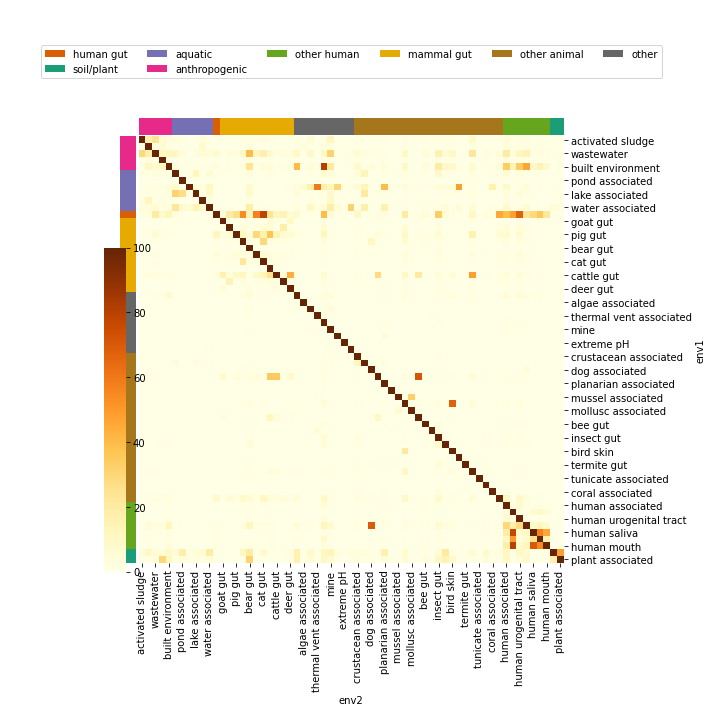

In [11]:
g = sns.clustermap(data=df,
                   col_colors=colors,
                   row_colors=colors,
                   cmap='YlOrBr',
                   row_cluster=False,
                   col_cluster=False)

for label in color_map:
    g.ax_col_dendrogram.bar(0,
                            0,
                            color=color_map[label],
                            label=label,
                            linewidth=0)

g.ax_col_dendrogram.legend(loc="center", ncol=6)
g.cax.set_position([.15, .2, .03, .45])

### For high level environments

In [12]:
df = data.groupby('high')['amp'].apply(lambda x: set(chain.from_iterable(x)))

In [13]:
combs = permutations(df.index, 2)

newdf = []
for i, j in combs:
    set_i = df.loc[i]
    set_j = df.loc[j]
    n = len(set_i.intersection(set_j))
    newdf.append((i, j, n))
    
for i in df.index:
    newdf.append((i,
                  i,
                  len(df.loc[i]))
                )

newdf = pd.DataFrame(newdf, columns=['env1', 'env2', 'overlap'])
newdf = newdf.pivot(index='env1', columns='env2', values='overlap')
newdf

env2,anthropogenic,aquatic,human gut,mammal gut,other,other animal,other human,soil/plant
env1,,,,,,,,
anthropogenic,85988,7690,10195,4126,2396,2933,4379,7132
aquatic,7690,214176,1071,444,3842,3395,784,15974
human gut,10195,1071,111946,21535,351,9716,4769,1180
mammal gut,4126,444,21535,104523,202,15470,516,840
other,2396,3842,351,202,15145,480,375,1474
other animal,2933,3395,9716,15470,480,98593,719,1838
other human,4379,784,4769,516,375,719,20137,847
soil/plant,7132,15974,1180,840,1474,1838,847,315628


In [14]:
# normalize
newdf = newdf * 100 / newdf.max(axis=0)

# create mask of zeros
mask = np.zeros_like(newdf)
mask[np.tril_indices_from(mask)] = True

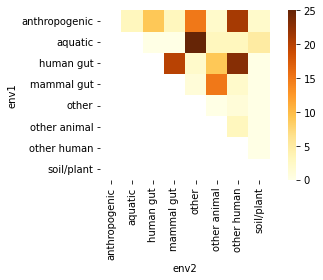

In [15]:
sns.heatmap(newdf.astype('int'),
            annot=False,
            cmap="YlOrBr",
            mask=mask, square=True)

plt.tight_layout()

### For animal guts

In [16]:
# getting AMP overlap from guts in each host
animal_guts = ['human gut', 'pig gut',
               'chicken gut', 'mouse gut',
               'dog gut', 'cat gut',
               'cattle gut']

combs = permutations(animal_guts, 2)

newdf = []
for i, j in combs:
    set_i = data.loc[i, 'amp']
    set_j = data.loc[j, 'amp']
    n = len(set_i.intersection(set_j))
    newdf.append((i, j, n))

for i in animal_guts:
    newdf.append((i,
                  i,
                  len(data.loc[i, 'amp']))
                )

newdf = pd.DataFrame(newdf, columns=['env1', 'env2', 'overlap'])
newdf = newdf.pivot(index='env1', columns='env2', values='overlap')
newdf

env2,cat gut,cattle gut,chicken gut,dog gut,human gut,mouse gut,pig gut
env1,,,,,,,
cat gut,2537,329,264,737,1995,121,426
cattle gut,329,32527,574,406,3866,242,4627
chicken gut,264,574,18259,268,8302,407,1114
dog gut,737,406,268,3392,1835,143,394
human gut,1995,3866,8302,1835,111946,1449,13152
mouse gut,121,242,407,143,1449,7438,362
pig gut,426,4627,1114,394,13152,362,50247


In [17]:
# normalize
newdf = newdf * 100 / newdf.max(axis=0)

# create mask of zeros
mask = np.zeros_like(newdf)
mask[np.tril_indices_from(mask)] = True

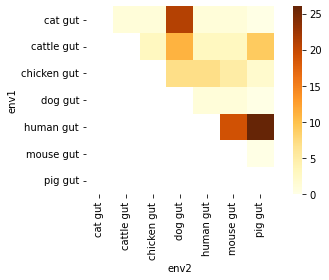

In [18]:
sns.heatmap(newdf.astype('int'),
            annot=False,
            cmap="YlOrBr",
            mask=mask, square=True)

plt.tight_layout()

### For human body sites

In [19]:
human_body = ['human skin', 'human respiratory tract',
              'human mouth',
              'human digestive tract', 'human gut',
              'human urogenital tract']

# we need to account for human mouth and human saliva
# they will become just human mouth
n = data.loc['human mouth', 'amp'].union(data.loc['human saliva', 'amp'])
data = data.drop(['human mouth', 'human saliva'], axis=0)
data.loc['human mouth', 'amp'] = n

In [20]:
# calculating overlaps
combs = permutations(human_body, 2)

newdf = []
for i, j in combs:
    set_i = data.loc[i, 'amp']
    set_j = data.loc[j, 'amp']
    n = len(set_i.intersection(set_j))
    newdf.append((i, j, n))

# adding pairs of same index
for i in human_body:
    newdf.append((i,
                  i,
                  len(data.loc[i, 'amp']))
                )

# formatting result
newdf = pd.DataFrame(newdf, columns=['env1', 'env2', 'overlap'])
newdf = newdf.pivot(index='env1', columns='env2', values='overlap')
newdf

env2,human digestive tract,human gut,human mouth,human respiratory tract,human skin,human urogenital tract
env1,,,,,,
human digestive tract,654,313,607,327,113,8
human gut,313,111946,3194,1196,1476,181
human mouth,607,3194,13624,2475,854,25
human respiratory tract,327,1196,2475,3377,419,12
human skin,113,1476,854,419,6295,76
human urogenital tract,8,181,25,12,76,269


In [21]:
# normalize
newdf = newdf * 100 / newdf.max(axis=0)

# create mask of zeros
mask = np.zeros_like(newdf)
mask[np.tril_indices_from(mask)] = True

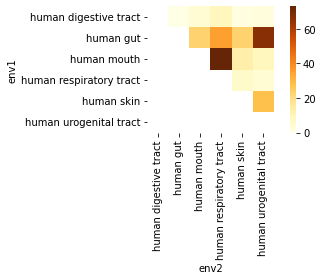

In [22]:
sns.heatmap(data=newdf.astype('int'),
            annot=False,
            cmap="YlOrBr",
            mask=mask, square=True)

plt.tight_layout()

## Testing significance of c_AMPs overlap in habitats

We tested overlap of c_AMP contents of habitats presenting AMPs in at least 100 samples. Then, a permutation test was performed by shuffling the labels of samples and recalculating the overlap between each pair of habitats 32 times. The average and standard deviation overlap c_AMPs was calculated and the Z-score of the actual measure was computed. The p-value is then calculated using the survival function of *scipy.stats*.

In [23]:
# loading data
data = pd.read_table('data/gmsc_amp_genes_envohr_source.tsv.gz',
                     sep='\t',
                     header='infer')

# filter duplicates
data = data[data.is_metagenomic == True]
data = data[['amp', 'sample', 'general_envo_name']].drop_duplicates()

In [24]:
# eliminating environments with less than 100 samples
df = data[['sample', 'general_envo_name']].drop_duplicates()
df = df.general_envo_name.value_counts()
df = df[df >= 100].index

df = data[data.general_envo_name.isin(df)].reset_index(drop=True)
df['high'] = df.general_envo_name.map(lambda x: higher_level.get(x))
df

,amp,sample,general_envo_name,high
0,AMP10.000_000,SAMEA104142073,human gut,human gut
1,AMP10.000_000,SAMEA104142074,human gut,human gut
2,AMP10.000_000,SAMEA104142075,human gut,human gut
3,AMP10.000_000,SAMEA104142076,human gut,human gut
4,AMP10.000_000,SAMEA104142077,human gut,human gut
...,...,...,...,...
5204979,AMP10.863_493,SRR6873777,marine,aquatic
5204980,AMP10.863_494,SAMN07483522,marine,aquatic
5204981,AMP10.863_495,TARA_094_SRF_0.22-3_G,marine,aquatic
5204982,AMP10.863_496,SAMN11532936,marine,aquatic


In [25]:
import numpy as np

from tqdm import tqdm
from random import shuffle
from scipy.stats import norm, shapiro


def reassignlabel(label: dict, values: list) -> dict:
    for k, v in zip(label, values):
        label[k] = v
    return label


def overlap(table, gp):
    itdf = table.groupby(gp)
    itdf = itdf['amp'].apply(lambda x: set(x))    
    a, b = itdf.tolist()
    return len(a.intersection(b))
    
    
def permtest(df, v1: str, v2: str, gp: str, n: int, verbose: bool) -> tuple:
    '''
    Permutation test
    It accepts a data frame (df) consisting of at least three columns: amp, sample, environment
    [ gp represents the column name with the environment labels ]
    Then it selects subsets of the dataframe by environments v1 and v2
    Shuffles the sample labels and calculate overlap
    '''
    
    ndf = df[df[gp].isin([v1, v2])]
    mov = overlap(ndf, gp)
    
    labels = ndf[['sample', gp]]
    labels = labels.set_index('sample')
    labels = labels.to_dict()[gp]
    
    vals = list(labels.values())
    
    tests = []
    for _ in tqdm(range(n)):
        shuffle(vals)
        labels = reassignlabel(labels, vals)
        itdf = ndf.copy()
        itdf[gp] = itdf['sample'].map(lambda x: labels.get(x))
        tests.append(overlap(itdf, gp))
    
    avg, std = np.mean(tests), np.std(tests)
    
    # test normal distribution:
    _, sp = shapiro(tests)
    
    # test result:
    z_score = (mov - avg) / std
    p_value = norm.sf(abs(z_score))
    
    if verbose:
        print(f'''The overlap between {v1} and {v2}: {mov} c_AMPs
        Permutation test: avg = {avg}, std = {std}
        Normal distribution: Shapiro-Wilk - p = {sp}
        Overlap significance: p = {p_value}''')
        
    return (v1, v2, mov, avg, std, sp, z_score, p_value)

In [26]:
from itertools import combinations

permutation_habitats = []

for v1, v2 in combinations(set(df.general_envo_name), 2):
    
    t = permtest(df=df,
                 v1=v1,
                 v2=v2,
                 gp='general_envo_name',
                 n=32,
                 verbose=False)
    
    permutation_habitats.append(t)

permutation_habitats = pd.DataFrame(permutation_habitats,
                                   columns=['habitat1',
                                            'habitat2',
                                            'overlap_amps',
                                            'random_overlap_avg',
                                            'random_overlap_std',
                                            'shapiro_test',
                                            'z_score',
                                            'p_value'])

permutation_habitats

100%|███████████████████████████████████████████| 32/32 [00:03<00:00,  8.88it/s]


100%|███████████████████████████████████████████| 32/32 [00:06<00:00,  4.95it/s]


100%|███████████████████████████████████████████| 32/32 [00:00<00:00, 45.64it/s]


,habitat1,habitat2,overlap_amps,random_overlap_avg,random_overlap_std,shapiro_test,z_score,p_value
0,primate gut,chicken gut,178,11606.06250,228.502043,0.743633,-50.012955,0.000000e+00
1,primate gut,activated sludge,70,19289.18750,331.522853,0.696823,-57.972436,0.000000e+00
2,primate gut,cattle gut,649,16629.93750,148.518083,0.354593,-107.602638,0.000000e+00
3,primate gut,fermented food,10,3368.56250,159.065226,0.230347,-21.114373,2.934183e-99
4,primate gut,air,27,4021.46875,141.063147,0.913232,-28.316884,1.070775e-176
...,...,...,...,...,...,...,...,...
460,human mouth,human saliva,5236,7875.81250,83.901891,0.679308,-31.463087,1.389971e-217
461,human mouth,human urogenital tract,18,3202.65625,126.824339,0.441152,-25.110766,1.896938e-139
462,insect associated,human saliva,3,2746.96875,135.484428,0.002279,-20.253019,1.670596e-91
463,insect associated,human urogenital tract,3,1236.12500,50.604317,0.916968,-24.367980,1.869230e-131


In [27]:
#exporting results
permutation_habitats.to_csv('overlap_permutationtest_habitats.tsv.gz',
                           sep='\t',
                           header=True,
                           index=None)

## Testing significance of c_AMPs overlap in high level groups of habitats

We tested overlap of c_AMP contents of high level groups of habitats presenting AMPs. Then, a permutation test was performed by shuffling the labels of samples and recalculating the overlap between each pair of habitats 32 times. The average and standard deviation overlap c_AMPs was calculated and the Z-score of the actual measure was computed. The p-value is then calculated using the survival function of *scipy.stats*.

In [28]:
# eliminating environments with less than 100 samples
df = data[['sample', 'general_envo_name', 'amp']].drop_duplicates()
df['high'] = df.general_envo_name.map(lambda x: higher_level.get(x))
df

,sample,general_envo_name,amp,high
12,SAMEA104142073,human gut,AMP10.000_000,human gut
13,SAMEA104142074,human gut,AMP10.000_000,human gut
14,SAMEA104142075,human gut,AMP10.000_000,human gut
15,SAMEA104142076,human gut,AMP10.000_000,human gut
16,SAMEA104142077,human gut,AMP10.000_000,human gut
...,...,...,...,...
5518289,SRR6873777,marine,AMP10.863_493,aquatic
5518290,SAMN07483522,marine,AMP10.863_494,aquatic
5518291,TARA_094_SRF_0.22-3_G,marine,AMP10.863_495,aquatic
5518292,SAMN11532936,marine,AMP10.863_496,aquatic


In [29]:
permutation_high = []

for v1, v2 in combinations(set(df.high), 2):
    
    t = permtest(df=df,
                 v1=v1,
                 v2=v2,
                 gp='high',
                 n=32,
                 verbose=False)
    
    permutation_high.append(t)

permutation_high = pd.DataFrame(permutation_high,
                                columns=['habitat1',
                                         'habitat2',
                                         'overlap_amps',
                                         'random_overlap_avg',
                                         'random_overlap_std',
                                         'shapiro_test',
                                         'z_score',
                                         'p_value'])

permutation_high

100%|███████████████████████████████████████████| 32/32 [00:12<00:00,  2.67it/s]


,habitat1,habitat2,overlap_amps,random_overlap_avg,random_overlap_std,shapiro_test,z_score,p_value
0,aquatic,human gut,1071,128350.59375,2394.893067,0.445277,-53.146253,0.000000e+00
1,aquatic,soil/plant,15974,322685.71875,2765.287962,0.393765,-110.914929,0.000000e+00
2,aquatic,other,3842,85550.46875,2556.574588,0.857591,-31.960135,1.953347e-224
3,aquatic,mammal gut,444,182488.06250,1410.807702,0.031592,-129.035348,0.000000e+00
4,aquatic,other animal,3400,155596.68750,2902.422355,0.336617,-52.437815,0.000000e+00
5,aquatic,other human,784,135226.53125,1365.501464,0.187689,-98.456527,0.000000e+00
6,aquatic,anthropogenic,7690,175822.68750,1112.631100,0.769263,-151.112698,0.000000e+00
7,human gut,soil/plant,1180,156377.90625,4108.430360,0.195672,-37.775474,0.000000e+00
8,human gut,other,351,25429.50000,640.941251,0.757072,-39.127611,0.000000e+00
9,human gut,mammal gut,21545,70341.06250,1156.594515,0.302601,-42.189429,0.000000e+00


In [30]:
#exporting results
permutation_high.to_csv('overlap_permutationtest_high.tsv.gz',
                        sep='\t',
                        header=True,
                        index=None)

**NOTE:** Shapiro-Wilk test showed that during some permutations, the distribution was not normal. To address this problem, we suggest convert the z_scores in the final dataframe by using the [Chebyshev's inequality](), which states the probability of data distant more than N standard deviations from the average:

Pr(|𝜇−𝜎| >= k*𝜎) <= 1 / k^2

Although it does not reveal much about the percentile position, gives a probability that can be extended to all observations regardless the distribution.

In [31]:
# for python it can be implemented as follows:
def Chebyshev_inequality(num_std_deviations):
    
    return 1 / num_std_deviations**2

### Creating Sample-based accumulation curves

We generate sets of c_AMPs per sample, then group them by high/habitat. We then randomly select a path to continuously grow the curves. This random seed is then added consecutively to randomly selected samples and the number of AMPs is counted until end the process. The curve is computed 32 times for each environment and the average is plotted with the error for each dot.

**Collector's curve for high level habitat groups**

In [32]:
# selecting data
itdf = df.groupby(['high', 'general_envo_name', 'sample'])['amp'].apply(lambda x: set(x)).reset_index()
itdf

,high,general_envo_name,sample,amp
0,anthropogenic,activated sludge,SAMEA103904932,"{AMP10.092_510, AMP10.171_789, AMP10.219_862, ..."
1,anthropogenic,activated sludge,SAMEA103904933,"{AMP10.424_484, AMP10.019_275, AMP10.082_238, ..."
2,anthropogenic,activated sludge,SAMEA103904934,"{AMP10.424_484, AMP10.019_275, AMP10.202_160, ..."
3,anthropogenic,activated sludge,SAMEA103904935,"{AMP10.171_789, AMP10.230_340, AMP10.296_557, ..."
4,anthropogenic,activated sludge,SAMEA103904936,"{AMP10.608_598, AMP10.202_160, AMP10.504_601, ..."
...,...,...,...,...
61388,soil/plant,soil,mgs635545,"{AMP10.586_686, AMP10.017_545, AMP10.678_902, ..."
61389,soil/plant,soil,mgs635549,"{AMP10.001_403, AMP10.528_623, AMP10.783_047, ..."
61390,soil/plant,soil,mgs635552,"{AMP10.034_563, AMP10.377_174, AMP10.313_001, ..."
61391,soil/plant,soil,mgs635561,"{AMP10.166_381, AMP10.343_469, AMP10.113_861, ..."


In [33]:
high_habitats = itdf.high.value_counts()
high_habitats = high_habitats.sort_values()
high_habitats = high_habitats.index

In [34]:
import numpy as np
from itertools import chain


def collectors(df, envo: str, col: str, perms=None, step=None):   
    if step == None: step = 10
    if perms == None: perms = 32
    n_itdf = df[df[col] == envo]['amp']
    f = []
    L = len(n_itdf)
    for k in tqdm(range(1, L+1, step)):
        if k != L:
            presult = 0
            for p in range(perms):
                s = n_itdf.sample(k)
                s = set(chain.from_iterable(s))
                presult += len(s)
            presult = presult / perms
        else:
            presult = len(set(chain.from_iterable(n_itdf)))
        f.append(presult)
    return (envo, f)

In [35]:
ccurves = []
for i in high_habitats:
    h, c = collectors(df=itdf,
                      envo=i,
                      col='high',
                      perms=32)
    
    ccurves.append((h, c))

100%|█████████████████████████████████████| 3264/3264 [3:01:41<00:00,  3.34s/it]


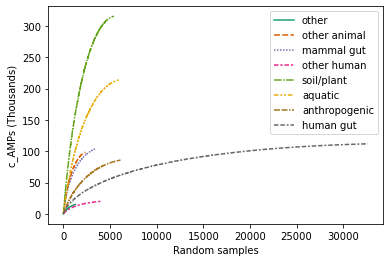

In [36]:
avg_table = pd.DataFrame([x[1] for x in ccurves],
                         index=[x[0] for x in ccurves]).T

avg_table['samples'] = [(x*10)+1 for x in avg_table.index]
avg_table = avg_table.set_index('samples')

sns.lineplot(data=avg_table/1000, palette='Dark2')

plt.ylabel('c_AMPs (Thousands)')
plt.xlabel('Random samples')
plt.savefig('collector_curves_highenvo.svg')

In [37]:
# export avg_table
avg_table.to_csv('collectors_curve_highenvo.tsv.gz',
                 sep='\t',
                 header=True,
                 index=True)


In [38]:
# only test environments with at least 100 samples
k = itdf.general_envo_name.value_counts()
k = k.sort_values()
k = k[k >= 100].index

sitdf = itdf[itdf.general_envo_name.isin(k)]

ccurves = []
for i in k:
    h, c = collectors(df=sitdf,
                      envo=i,
                      col='general_envo_name',
                      perms=32)
    
    ccurves.append((h, c))

100%|█████████████████████████████████████| 3264/3264 [2:58:20<00:00,  3.28s/it]


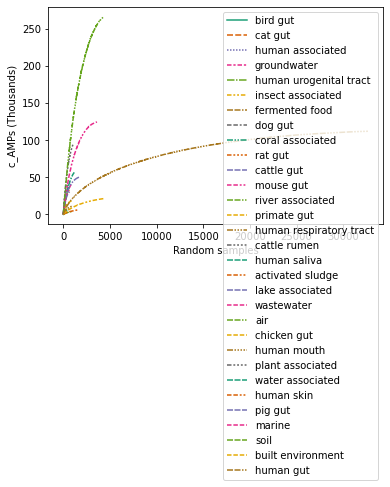

In [39]:
avg_table = pd.DataFrame([x[1] for x in ccurves],
                         index=[x[0] for x in ccurves]).T

avg_table['samples'] = [(x*10)+1 for x in avg_table.index]
avg_table = avg_table.set_index('samples')

sns.lineplot(data=avg_table/1000,
             palette='Dark2')

plt.ylabel('c_AMPs (Thousands)')
plt.xlabel('Random samples')
plt.savefig('collector_curves_generalenvo.svg')

In [40]:
# export avg_table
avg_table.to_csv('collectors_curve_generalenvo.tsv.gz',
                 sep='\t',
                 header=True,
                 index=True)